Titanic Survival Project 

==> Data fields with null information:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------


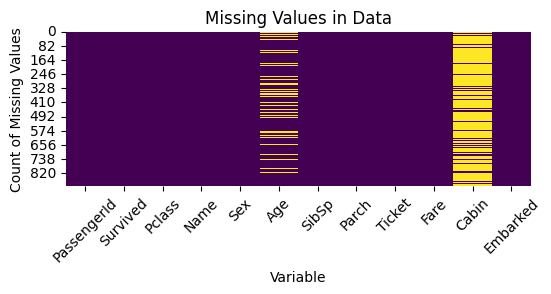

----------------------------------------
Table of outlier values to assess:
     PassengerId  Survived  Pclass                                  Name  \
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
280          281         0       3                      Duane, Mr. Frank   
456          457         0       1             Millet, Mr. Francis Davis   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex  

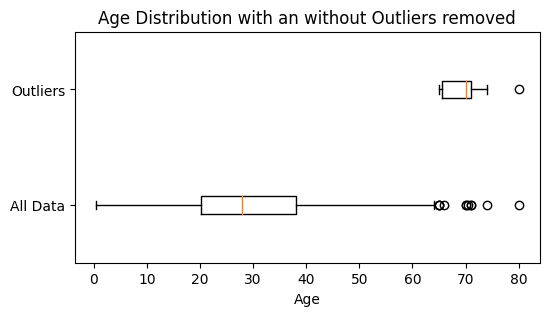

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


print("==> Data fields with null information:")
print(df_train.isnull().sum())
print("----------------------------------------")

outliers = df_train[(df_train['Age'] > 15)]

plt.figure(figsize=(6, 2))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel('Variable')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Data')
plt.show()

print("----------------------------------------")
print("Table of outlier values to assess:")

q1 = df_train['Age'].quantile(0.25)
q2 = df_train['Age'].quantile(0.75)
lb = q1 - (q2-q1) * 1.5
ub = q2 + (q2-q1) * 1.5
outliers = df_train[(df_train['Age'] > ub) | (df_train['Age'] < lb)]
# Display the outliers
print(outliers)
print("----------------------------------------")



plt.figure(figsize=(6,3))
plt.boxplot([df_train["Age"].dropna(), outliers["Age"]], labels=['All Data', 'Outliers'], vert=False)
plt.xlabel('Age')
plt.title('Age Distribution with an without Outliers removed')
plt.show()

In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


features = ['Sex', 'Age', 'Fare', 'Pclass']
X = df_train[features]
y = df_train['Survived']


features = ['Sex', 'Age', 'Fare', 'Pclass'] # Select features 
X = df_train[features]                      # Prepare features
y = df_train['Survived']

X_encoded = pd.get_dummies(X, drop_first=True) # one-hot encoding on categorical

# Handle missing values 
imputer = SimpleImputer(strategy='mean')  ## imputing with the mean
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
X_imputed = pd.DataFrame(imputer.fit_transform(X_encoded), columns=X_encoded.columns)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,0))

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Confusion Matrix:
[[89 16]
 [20 54]]


**`Stage 5: Visualization`**

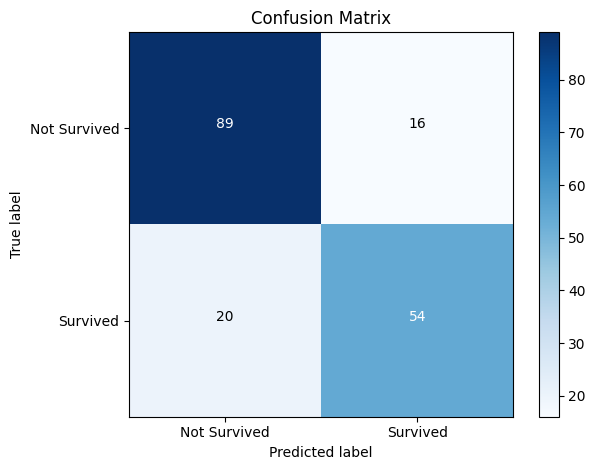

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix = np.array(confusion)

# Define the class labels
classes = ['Not Survived', 'Survived']

# Plot the confusion matrix
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label the matrix cells
thresh = confusion_matrix.max() / 2.
for i, j in np.ndindex(confusion_matrix.shape):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Add axis labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Show the plot
plt.show()
